### This file is used for model training
- data prep was done beforehand
- ./Projekt_Bewerbung/buildDiffer/BuildDiffer/training_data.csv contains a csv with build metrics used for training and testing the model 
- The labels can be extracted from the ./Projekt_Bewerbung/data/travistorrent_100commits_withoutduplicates.csv 
as the order is still the same for both files 

- - pass 
- - fail
- - errored
- - canceled

## Data Preparation

### Imports

In [97]:
import pandas as pd
import numpy as np
#!pip3 install matplotlib
import matplotlib.pyplot as plt
#!pip3 install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import CondensedNearestNeighbour
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Read in data

In [98]:
data = pd.read_csv('/Users/Rina/Desktop/StudiAssistent/Projekt_Bewerbung/buildDiffer/BuildDiffer/training_data.csv')

#print(data.head())
#    DependencyChange  TeamChange  RepositoryChange  GeneralChange  BuildChange   BuildResult         
#0                 0           0                 5              0            1    errored

labels = pd.DataFrame(data['BuildResult'])
print(labels.head())

data = data.drop(['BuildResult'], axis=1)
print(data.head())

# dummy data 
#import numpy as np
#data = pd.DataFrame(np.random.randint(0,10, size=(100,1)))

  BuildResult
0      passed
1    canceled
2    canceled
3      passed
4    canceled
   DependencyChange  TeamChange  RepositoryChange  GeneralChange  BuildChange
0                 0           0                 0              1            0
1                 0           0                 0              0            0
2                 0           0                 0              0            0
3                 0           0                 0              1            0
4                 0           0                 0              0            0


### Dataset splitting

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.2)

print('Training data', X_train)
print('Training labels', y_train)

Training data     DependencyChange  TeamChange  RepositoryChange  GeneralChange  BuildChange
75                 0           0                 0              1            0
3                  0           0                 0              1            0
64                 0           0                 0              0            0
76                 0           0                 0              0            0
42                 0           0                 0              0            0
..               ...         ...               ...            ...          ...
55                 0           0                 0              0            0
87                 0           0                 0              0            0
38                 0           0                 0              0            0
81                 0           0                 0              1            0
53                 0           0                 0              0            1

[71 rows x 5 columns]
Training labels

### Oversampling

In [100]:
# TODO introduced bc first version of data consisted of almost only errored buildresults; new dataset containts 25 samples of all 4 classes 
# use only on training data 

print('Training data shape before oversampling')
print('Data', X_train.shape)
print('Labels', y_train.shape)

smote = SMOTE()
X_oversampled, y_oversampled = smote.fit_resample(X_train,y_train)
print('Post oversampling using smote')
print(X_oversampled.shape)
print(y_oversampled.shape)

# TODO introduced bc first version of data consisted of almost only errored buildresults; new dataset containts 25 samples of all 4 classes 
# use only on training data 

#ada = ADASYN(sampling_strategy='minority') # solution from stackoverflow

#X_oversampled, y_oversampled = ada.fit_resample(X_train,y_train)
#print('Post oversampling using adasyn')
#print(X_oversampled.shape)
#print(y_oversampled.shape)


Training data shape before oversampling
Data (71, 5)
Labels (71, 1)
Post oversampling using smote
(84, 5)
(84, 1)


### Undersampling

In [102]:
# TODO introduced bc first version of data consisted of almost only errored buildresults; new dataset containts 25 samples of all 4 classes 
# use only on training data 

print('Training data shape before undersampling')
print('Data', X_train.shape)
print('Labels', y_train.shape)

#tomek_links = TomekLinks()
#X_undersampled, y_undersampled = tomek_links.fit_resample(X_train,y_train)
#print('Post undersampling using Tomek Links')
#print(X_undersampled.shape)
#print(y_undersampled.shape)

# TODO introduced bc first version of data consisted of almost only errored buildresults; new dataset containts 25 samples of all 4 classes 
# use only on training data 

cnn = CondensedNearestNeighbour()

X_undersampled, y_undersampled = cnn.fit_resample(X_train,y_train)
print('Post undersampling using CNN')
print(X_undersampled.shape)
print(y_undersampled.shape)


Training data shape before undersampling
Data (71, 5)
Labels (71, 1)
Post undersampling using CNN
(44, 5)
(44, 1)


## Model training & Evaluation

### Helper methods

In [104]:
def predict(X_train, y_train, X_test):
    classifier = RandomForestClassifier()
    classifier.fit(X_undersampled, y_undersampled)

    test_preditctions = classifier.predict(X_test)
    return classifier, test_preditctions

def calculateAccuracyPrintStats(y_test, test_preditctions):
    print('True labels: ', y_test)
    print('Predicted labels: ', test_preditctions)
    # true values , predicted values 
    accuracy = accuracy_score(y_test, test_preditctions)
    print('\nAccuracy: ', accuracy)
    print(classification_report(y_test, test_preditctions))

def plotPredictions(y_test, test_preditctions):
    size_test_set = y_test.shape[0] # row = [0], col = [1]
    #print(size_test_set)

    # plot actual test point and prediction
    plt.scatter(np.arange(1, 19), test_preditctions, color="red") 
    plt.scatter(np.arange(1, 19), y_test['BuildResult'], color="blue") 

### Train Random Forest using dataset from prep without any resampling

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


True labels:     BuildResult
69     errored
70    canceled
34      failed
78      failed
79    canceled
57      passed
63      passed
66     errored
4     canceled
6     canceled
22      passed
59      passed
19      failed
88     errored
49      passed
65    canceled
7     canceled
39    canceled
Predicted labels:  ['errored' 'canceled' 'canceled' 'canceled' 'canceled' 'errored' 'errored'
 'errored' 'canceled' 'canceled' 'canceled' 'canceled' 'canceled'
 'canceled' 'canceled' 'canceled' 'canceled' 'canceled']

Accuracy:  0.5
              precision    recall  f1-score   support

    canceled       0.50      1.00      0.67         7
     errored       0.50      0.67      0.57         3
      failed       0.00      0.00      0.00         3
      passed       0.00      0.00      0.00         5

    accuracy                           0.50        18
   macro avg       0.25      0.42      0.31        18
weighted avg       0.28      0.50      0.35        18



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


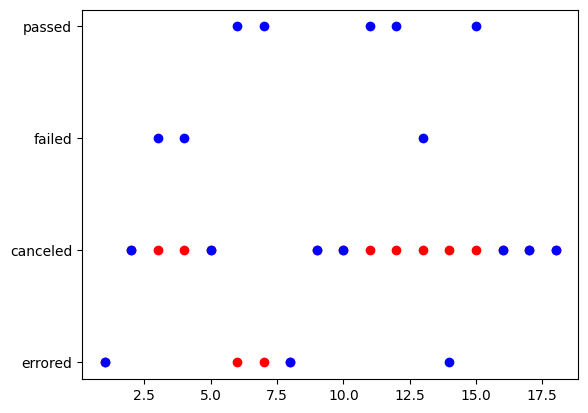

In [105]:
classifier, predictions_dataset = predict(X_train, y_train, X_test)
calculateAccuracyPrintStats(y_test, predictions_dataset)
plotPredictions(y_test, predictions_dataset)

### Train Random Forest and use oversampling 

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


True labels:     BuildResult
69     errored
70    canceled
34      failed
78      failed
79    canceled
57      passed
63      passed
66     errored
4     canceled
6     canceled
22      passed
59      passed
19      failed
88     errored
49      passed
65    canceled
7     canceled
39    canceled
Predicted labels:  ['errored' 'canceled' 'canceled' 'canceled' 'canceled' 'errored' 'errored'
 'errored' 'canceled' 'canceled' 'canceled' 'canceled' 'canceled'
 'canceled' 'canceled' 'canceled' 'canceled' 'canceled']

Accuracy:  0.5
              precision    recall  f1-score   support

    canceled       0.50      1.00      0.67         7
     errored       0.50      0.67      0.57         3
      failed       0.00      0.00      0.00         3
      passed       0.00      0.00      0.00         5

    accuracy                           0.50        18
   macro avg       0.25      0.42      0.31        18
weighted avg       0.28      0.50      0.35        18



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


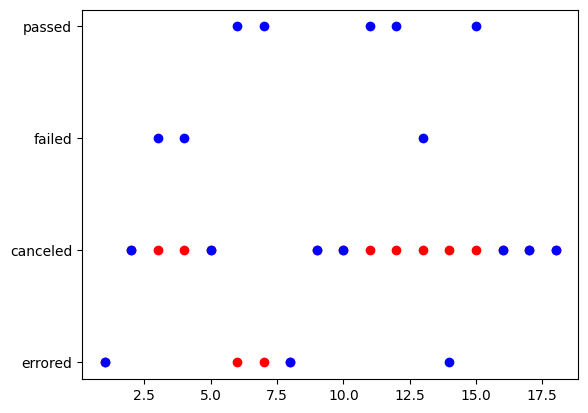

In [106]:
classifier_oversampled, predictions_oversampled_dataset = predict(X_oversampled, y_oversampled, X_test)
calculateAccuracyPrintStats(y_test, predictions_oversampled_dataset)
plotPredictions(y_test, predictions_oversampled_dataset)

### Train Random Forest and use undersampling 

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


True labels:     BuildResult
69     errored
70    canceled
34      failed
78      failed
79    canceled
57      passed
63      passed
66     errored
4     canceled
6     canceled
22      passed
59      passed
19      failed
88     errored
49      passed
65    canceled
7     canceled
39    canceled
Predicted labels:  ['failed' 'canceled' 'canceled' 'canceled' 'canceled' 'failed' 'failed'
 'failed' 'canceled' 'canceled' 'canceled' 'canceled' 'canceled'
 'canceled' 'canceled' 'canceled' 'canceled' 'canceled']

Accuracy:  0.3888888888888889
              precision    recall  f1-score   support

    canceled       0.50      1.00      0.67         7
     errored       0.00      0.00      0.00         3
      failed       0.00      0.00      0.00         3
      passed       0.00      0.00      0.00         5

    accuracy                           0.39        18
   macro avg       0.12      0.25      0.17        18
weighted avg       0.19      0.39      0.26        18



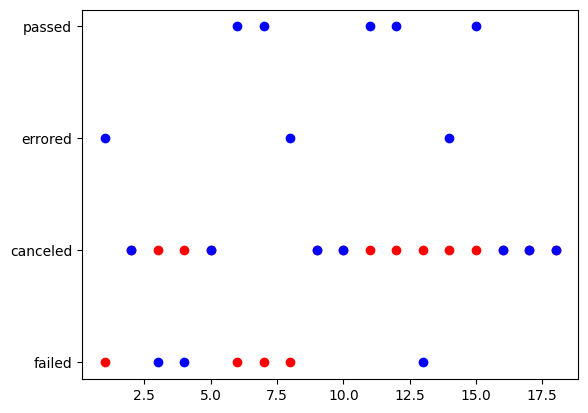

In [107]:
classifier_undersampled, predictions_undersampled_dataset = predict(X_undersampled, y_undersampled, X_test)
calculateAccuracyPrintStats(y_test, predictions_undersampled_dataset)
plotPredictions(y_test, predictions_undersampled_dataset)

## Variable Importance Analysis (VIA)

### Gini Importance

<Axes: >

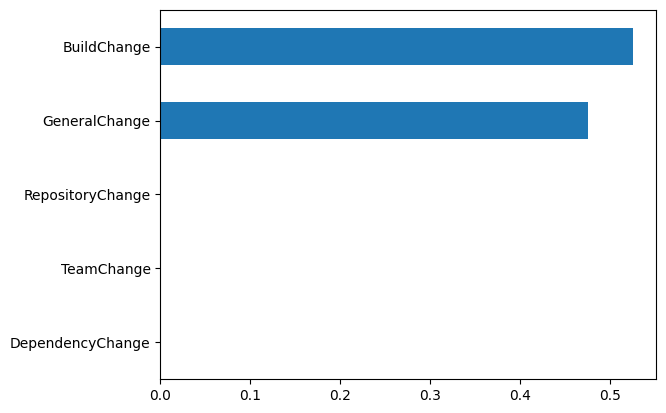

In [108]:
#classifier = RandomForestClassifier(criterion='gini') set per default :)
feature_importances = classifier.feature_importances_
# print(feature_importances)
# mitgeben, mit welchen Spalten trainiert wurde 
feature_importances_dataseries = pd.Series(feature_importances, X_train.columns)
feature_importances_dataseries = feature_importances_dataseries.sort_values(ascending=True)
feature_importances_dataseries.plot.barh()

### SHAP values

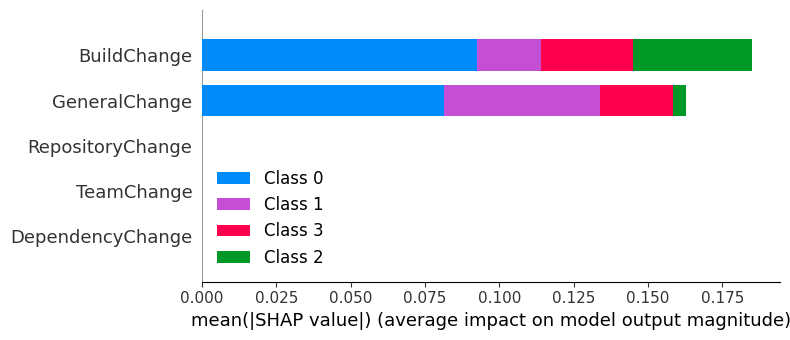

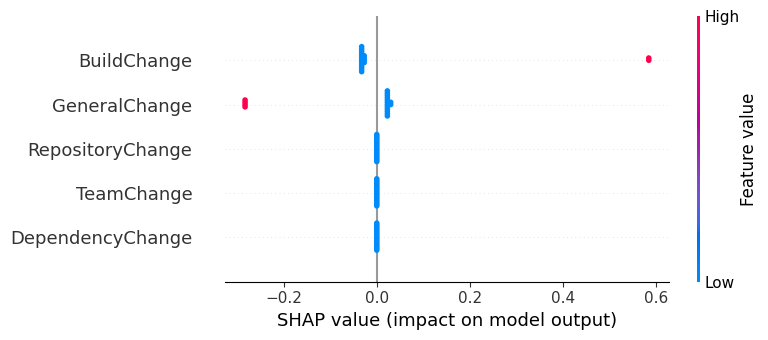

In [109]:
#!pip3 install shap

import shap

# inspo from tutorial of datacamp.com 
shap_explainer = shap.Explainer(classifier)
shap_values = shap_explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values[0], X_test)
# dependence plot for specific feature
# force plot
# decision plot 